## Import dataset

In [1]:
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('795813_1365687_bundle_archive/input_bcell.csv')

dataset.head()

,parent_protein_id,protein_seq,start_position,end_position,peptide_seq,chou_fasman,emini,kolaskar_tongaonkar,parker,isoelectric_point,aromaticity,hydrophobicity,stability,target
0,A2T3T0,MDVLYSLSKTLKDARDKIVEGTLYSNVSDLIQQFNQMIITMNGNEF...,161,165,SASFT,1.016,0.703,1.018,2.22,5.810364,0.103275,-0.143829,40.273300,1
1,F0V2I4,MTIHKVAINGFGRIGRLLFRNLLSSQGVQVVAVNDVVDIKVLTHLL...,251,255,LCLKI,0.770,0.179,1.199,-3.86,6.210876,0.065476,-0.036905,24.998512,1
2,O75508,MVATCLQVVGFVTSFVGWIGVIVTTSTNDWVVTCGYTIPTCRKLDE...,145,149,AHRET,0.852,3.427,0.960,4.28,8.223938,0.091787,0.879227,27.863333,1
3,O84462,MTNSISGYQPTVTTSTSSTTSASGASGSLGASSVSTTANATVTQTA...,152,156,SNYDD,1.410,2.548,0.936,6.32,4.237976,0.044776,-0.521393,30.765373,1
4,P00918,MSHHWGYGKHNGPEHWHKDFPIAKGERQSPVDIDTHTAKYDPSLKP...,85,89,DGTYR,1.214,1.908,0.937,4.64,6.867493,0.103846,-0.578846,21.684615,1


## Check columns

In [2]:
dataset.columns

Index(['parent_protein_id', 'protein_seq', 'start_position', 'end_position',
       'peptide_seq', 'chou_fasman', 'emini', 'kolaskar_tongaonkar', 'parker',
       'isoelectric_point', 'aromaticity', 'hydrophobicity', 'stability',
       'target'],
      dtype='object')

## Search for null values

In [3]:
dataset.isnull().sum()

parent_protein_id      0
protein_seq            0
start_position         0
end_position           0
peptide_seq            0
chou_fasman            0
emini                  0
kolaskar_tongaonkar    0
parker                 0
isoelectric_point      0
aromaticity            0
hydrophobicity         0
stability              0
target                 0
dtype: int64

## Search for categorical columns

In [4]:
for col in dataset.columns:
    x = dataset[col].unique()
    if len(x) < 20:
        print(f"{col}: {x}")

target: [1 0]


## Remove irrelevant features and get input data

In [5]:
X = dataset.drop(columns=['parent_protein_id', 'protein_seq', 'peptide_seq', 'target'])
X.head()

,start_position,end_position,chou_fasman,emini,kolaskar_tongaonkar,parker,isoelectric_point,aromaticity,hydrophobicity,stability
0,161,165,1.016,0.703,1.018,2.22,5.810364,0.103275,-0.143829,40.273300
1,251,255,0.770,0.179,1.199,-3.86,6.210876,0.065476,-0.036905,24.998512
2,145,149,0.852,3.427,0.960,4.28,8.223938,0.091787,0.879227,27.863333
3,152,156,1.410,2.548,0.936,6.32,4.237976,0.044776,-0.521393,30.765373
4,85,89,1.214,1.908,0.937,4.64,6.867493,0.103846,-0.578846,21.684615


## Get output data

In [6]:
y = dataset['target']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

## Apply feature scaling

In [7]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

X

array([[-0.3863855 , -0.40451394,  0.17066955, ...,  1.06912809,
         0.66463514, -0.20564963],
       [-0.13195355, -0.15007612, -1.80099114, ..., -0.39782531,
         0.93560006, -1.12130643],
       [-0.43161785, -0.44974733, -1.14377091, ...,  0.62331337,
         3.25724616, -0.9495729 ],
       ...,
       [-0.3072289 , -0.29708464, -1.39223222, ..., -0.15555999,
        -0.7475483 ,  0.19010766],
       [ 3.33962909,  3.34985741,  0.59545824, ..., -1.21820059,
        -0.67131514, -0.8518031 ],
       [ 3.81456874,  3.824808  , -0.26213401, ..., -1.21820059,
        -0.67131514, -0.8518031 ]])

## Split data in training and test sets

In [8]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)

## Build ANN

In [9]:
# Imports
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense

classifier = Sequential()
classifier.add(Dense(units = 10, kernel_initializer = 'uniform', activation = 'relu', input_dim = 10))
classifier.add(Dense(units = 50, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 30, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 20, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
classifier.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])

classifier.fit(X_train, y_train, batch_size = 10, epochs = 100)

Epoch 1/100
1295/1295 [==============================] - 1s 1ms/step - loss: 0.5629 - accuracy: 0.7288
Epoch 2/100
1295/1295 [==============================] - 1s 954us/step - loss: 0.5511 - accuracy: 0.7292
Epoch 3/100
1295/1295 [==============================] - 1s 970us/step - loss: 0.5489 - accuracy: 0.7349
Epoch 4/100
1295/1295 [==============================] - 1s 955us/step - loss: 0.5463 - accuracy: 0.7398
Epoch 5/100
1295/1295 [==============================] - 1s 966us/step - loss: 0.5430 - accuracy: 0.7439
Epoch 6/100
1295/1295 [==============================] - 1s 959us/step - loss: 0.5374 - accuracy: 0.7506
Epoch 7/100
1295/1295 [==============================] - 1s 953us/step - loss: 0.5324 - accuracy: 0.7573
Epoch 8/100
1295/1295 [==============================] - 1s 951us/step - loss: 0.5280 - accuracy: 0.7581
Epoch 9/100
1295/1295 [==============================] - 1s 981us/step - loss: 0.5253 - accuracy: 0.7593
Epoch 10/100
1295/1295 [==============================] -

1295/1295 [==============================] - 1s 901us/step - loss: 0.4385 - accuracy: 0.8129
Epoch 79/100
1295/1295 [==============================] - 1s 907us/step - loss: 0.4379 - accuracy: 0.8133
Epoch 80/100
1295/1295 [==============================] - 1s 924us/step - loss: 0.4370 - accuracy: 0.8119
Epoch 81/100
1295/1295 [==============================] - 1s 948us/step - loss: 0.4364 - accuracy: 0.81290s - los
Epoch 82/100
1295/1295 [==============================] - 1s 943us/step - loss: 0.4318 - accuracy: 0.8148
Epoch 83/100
1295/1295 [==============================] - 1s 920us/step - loss: 0.4320 - accuracy: 0.8153
Epoch 84/100
1295/1295 [==============================] - 1s 936us/step - loss: 0.4349 - accuracy: 0.8127
Epoch 85/100
1295/1295 [==============================] - 1s 907us/step - loss: 0.4378 - accuracy: 0.8158
Epoch 86/100
1295/1295 [==============================] - 1s 886us/step - loss: 0.4328 - accuracy: 0.8188
Epoch 87/100
1295/1295 [===========================

## Save the ANN

In [10]:
# Save the model
classifier.save('test-abc-v02.h5')

# Save a dictionary into a pickle file.
import pickle
pickle.dump( sc, open( "test-abc-v02.p", "wb" ) )

## Predict over test set and check confusion matrix

In [11]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

cm

array([[957,  90],
       [209, 183]], dtype=int64)

<AxesSubplot:>

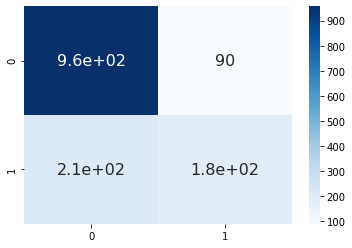

In [12]:
import seaborn as sn
sn.heatmap(cm, cmap="Blues", annot=True,annot_kws={"size": 16})

## Get final ANN accuracy over test set

In [13]:
from sklearn.metrics import accuracy_score

print('VALIDATION ACCURACY', accuracy_score(y_test, y_pred))

VALIDATION ACCURACY 0.7922168172341905


## Get SARS data

In [14]:
sars = pd.read_csv('795813_1365687_bundle_archive/input_sars.csv')

sars.head()

,parent_protein_id,protein_seq,start_position,end_position,peptide_seq,chou_fasman,emini,kolaskar_tongaonkar,parker,isoelectric_point,aromaticity,hydrophobicity,stability,target
0,AAU93319,MFIFLLFLTLTSGSDLDRCTTFDDVQAPNYTQHTSSMRGVYYPDEI...,1,17,MFIFLLFLTLTSGSDLD,0.887,0.040,1.056,-2.159,5.569763,0.116335,-0.061116,33.205116,0
1,AAU93319,MFIFLLFLTLTSGSDLDRCTTFDDVQAPNYTQHTSSMRGVYYPDEI...,1,15,MFIFLLFLTLTSGSD,0.869,0.047,1.056,-2.500,5.569763,0.116335,-0.061116,33.205116,0
2,AAU93319,MFIFLLFLTLTSGSDLDRCTTFDDVQAPNYTQHTSSMRGVYYPDEI...,2,10,FIFLLFLTL,0.621,0.042,1.148,-7.467,5.569763,0.116335,-0.061116,33.205116,0
3,AAU93319,MFIFLLFLTLTSGSDLDRCTTFDDVQAPNYTQHTSSMRGVYYPDEI...,6,20,LFLTLTSGSDLDRCT,1.021,0.230,1.049,0.927,5.569763,0.116335,-0.061116,33.205116,0
4,AAU93319,MFIFLLFLTLTSGSDLDRCTTFDDVQAPNYTQHTSSMRGVYYPDEI...,9,25,TLTSGSDLDRCTTFDDV,1.089,0.627,1.015,3.165,5.569763,0.116335,-0.061116,33.205116,0


In [15]:
sars.columns

Index(['parent_protein_id', 'protein_seq', 'start_position', 'end_position',
       'peptide_seq', 'chou_fasman', 'emini', 'kolaskar_tongaonkar', 'parker',
       'isoelectric_point', 'aromaticity', 'hydrophobicity', 'stability',
       'target'],
      dtype='object')

In [16]:
sars.isnull().sum()

parent_protein_id      0
protein_seq            0
start_position         0
end_position           0
peptide_seq            0
chou_fasman            0
emini                  0
kolaskar_tongaonkar    0
parker                 0
isoelectric_point      0
aromaticity            0
hydrophobicity         0
stability              0
target                 0
dtype: int64

In [17]:
X_sars = sars.drop(columns=['parent_protein_id', 'protein_seq', 'peptide_seq', 'target'])
X_sars.head()

,start_position,end_position,chou_fasman,emini,kolaskar_tongaonkar,parker,isoelectric_point,aromaticity,hydrophobicity,stability
0,1,17,0.887,0.040,1.056,-2.159,5.569763,0.116335,-0.061116,33.205116
1,1,15,0.869,0.047,1.056,-2.500,5.569763,0.116335,-0.061116,33.205116
2,2,10,0.621,0.042,1.148,-7.467,5.569763,0.116335,-0.061116,33.205116
3,6,20,1.021,0.230,1.049,0.927,5.569763,0.116335,-0.061116,33.205116
4,9,25,1.089,0.627,1.015,3.165,5.569763,0.116335,-0.061116,33.205116


In [18]:
y_sars = sars['target']
y_sars.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [19]:
X_sars = sc.transform(X_sars)

X_sars

array([[-1.76629438, -1.77339156, -1.30234227, ...,  0.        ,
         1.        , -1.        ],
       [-1.76629438, -1.77912256, -1.50898617, ...,  0.        ,
         1.        , -1.        ],
       [-1.76343107, -1.79345006, -4.35607989, ...,  0.        ,
         1.        , -1.        ],
       ...,
       [ 1.76989555,  1.77409692,  0.23600676, ...,  0.        ,
         1.        , -1.        ],
       [ 1.76989555,  1.75976942,  0.58041326, ...,  0.        ,
         1.        , -1.        ],
       [ 1.7842121 ,  1.77409692,  0.31636828, ...,  0.        ,
         1.        , -1.        ]])

In [20]:
# Predicting the Test set results

y_sars_pred = classifier.predict(X_sars)
y_sars_pred = (y_sars_pred > 0.5)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_sars, y_sars_pred)

cm

array([[379,   1],
       [139,   1]], dtype=int64)

In [21]:
from sklearn.metrics import accuracy_score

print('VALIDATION ACCURACY', accuracy_score(y_sars, y_sars_pred))

VALIDATION ACCURACY 0.7307692307692307
